# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Data collection and Analysis

In [2]:
# Loading the cancer patient data sets to a pandas DataFrame
cancer = pd.read_csv(r'C:\Users\Sabikun Nahar\Desktop\lung\lung\cancer-patient-data-sets.csv')

In [3]:
# Print the first 5 rows of the dataset 
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# number of rows and columns in this dataset
cancer.shape

(1000, 26)

In [5]:
# Checking for missing values
cancer.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
# Replace the value in level column
cancer = cancer.replace({'Level': {'Low': 0, 'Medium': 1,'High': 1}})

In [7]:
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1


In [8]:
# Statistical measure about the data
cancer.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.697000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.459785
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.000000


In [9]:
target = cancer['Level']
print(pd.value_counts(target))

1    697
0    303
Name: Level, dtype: int64


In [43]:
print('Percentage of 1 in Original DataSet : ',(697/1000)*100,'%')
print('Percentage of 0 in Original DataSet : ',(303/1000)*100,'%')

Percentage of 1 in Original DataSet :  69.69999999999999 %
Percentage of 0 in Original DataSet :  30.3 %


# Separating the data and labels

In [11]:
train_data, test_data = train_test_split(cancer, test_size=0.3, 
random_state= 2)

In [12]:
print('\nShape of training data :',train_data.shape)


Shape of training data : (700, 26)


In [13]:
print(pd.value_counts(train_data['Level']))

1    486
0    214
Name: Level, dtype: int64


In [42]:
print('Percentage of 1 in Training DataSet : ',(486/700)*100,'%')
print('Percentage of 0 in Training DataSet : ',(214/700)*100,'%')

Percentage of 1 in Training DataSet :  69.42857142857143 %
Percentage of 0 in Training DataSet :  30.571428571428573 %


In [15]:
print('\nShape of testing data :',test_data.shape)


Shape of testing data : (300, 26)


In [16]:
print(pd.value_counts(test_data['Level']))

1    211
0     89
Name: Level, dtype: int64


In [41]:
print('Percentage of 1 in Testing DataSet : ', (211/300)*100,'%')
print('Percentage of 0 in Testing DataSet : ', (89/300)*100,'%')

Percentage of 1 in Testing DataSet :  70.33333333333334 %
Percentage of 0 in Testing DataSet :  29.666666666666668 %


In [18]:
train_data, test_data = train_test_split(cancer, test_size=0.3, 
random_state=2, stratify=target)

# Separate the independent and target variables

In [19]:
train_x = train_data.drop(columns=['index','Patient Id','Level'],axis=1)
train_y = train_data['Level']

In [20]:
test_x = test_data.drop(columns=['index','Patient Id','Level'],axis=1)
test_y = test_data['Level']

In [21]:
print(train_x.shape,
train_y.shape)

(700, 23) (700,)


# Machine Learning Model 
## RandomForestClassifier

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(train_x,train_y)

RandomForestClassifier()

In [24]:
# number of trees used
print('Number of trees used : ',model.n_estimators)

Number of trees used :  100


# Predict and Accuracy Score

In [25]:
# Accuracy score on the training data 
predict_X_train = model.predict(train_x)
training_accuracy = accuracy_score(predict_X_train , train_y)

In [26]:
print('Accuracy score on training data : ',training_accuracy)

Accuracy score on training data :  1.0


In [27]:
# Accuracy score on the test data
predict_X_test = model.predict(test_x)
test_accuracy = accuracy_score(predict_X_test , test_y)

In [28]:
print('Accuracy score on test data : ',test_accuracy)

Accuracy score on test data :  1.0


# Confusion Matrix

In [29]:
c_m_train = confusion_matrix(train_y,predict_X_train)
print(c_m_train)
tn,fp,fn,tp = c_m_train.ravel()
print(tn,fp,fn,tp)

[[212   0]
 [  0 488]]
212 0 0 488


In [30]:
c_m_test = confusion_matrix(test_y,predict_X_test)
print(c_m_test)
tn,fp,fn,tp = c_m_test.ravel()
print(tn,fp,fn,tp)

[[ 91   0]
 [  0 209]]
91 0 0 209


 # Precision Score

In [31]:
# Precision for training data 
precision_train = precision_score(train_y , predict_X_train)
print('Training data precision : ',precision_train)

Training data precision :  1.0


In [32]:
# Precision for testing data 
precision_test = precision_score(test_y , predict_X_test)
print('Testing data precision : ',precision_test)

Testing data precision :  1.0


# Recall Score 

In [33]:
# Recall for training data 
recall_train = recall_score(train_y , predict_X_train)
print('Training data recall : ',recall_train)

Training data recall :  1.0


In [34]:
# Recall for testing data 
recall_test = recall_score(test_y , predict_X_test)
print('Testing data recall : ',recall_test)

Testing data recall :  1.0


# F1 Score 

In [35]:
# F1_Score for training data 
f1_train = f1_score(train_y , predict_X_train)
print('Training data f1 : ',f1_train)

Training data f1 :  1.0


In [36]:
 # F1_Score for testing data 
f1_test = f1_score(test_y , predict_X_test)
print('Testing data f1 : ',f1_test)

Testing data f1 :  1.0


# Plot Roc and compare Auc

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

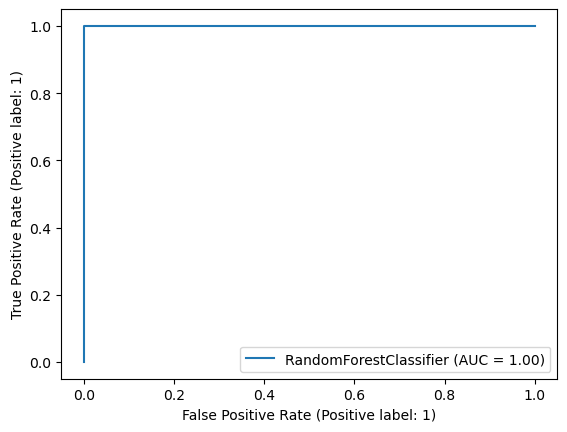

In [38]:
model_disp = RocCurveDisplay.from_estimator(model,test_x,test_y)
plt.show()

# Feature importances :the higher ,the more important the feature

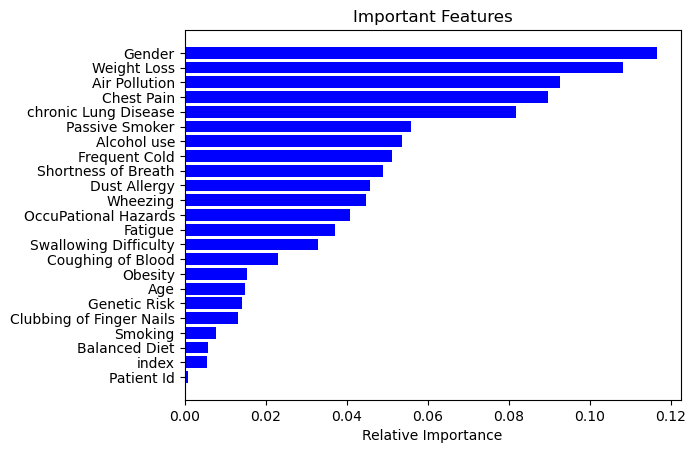

In [39]:
    features = cancer.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.title('Important Features')
    plt.barh(range(len(indices)),importances[indices],color='b')
    plt.yticks(range(len(indices)),[features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    